## import packages

In [30]:
# import packages
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
import numpy as np

## Download dataset and Visualize

In [43]:
transform = transforms.ToTensor()

Train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
Test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


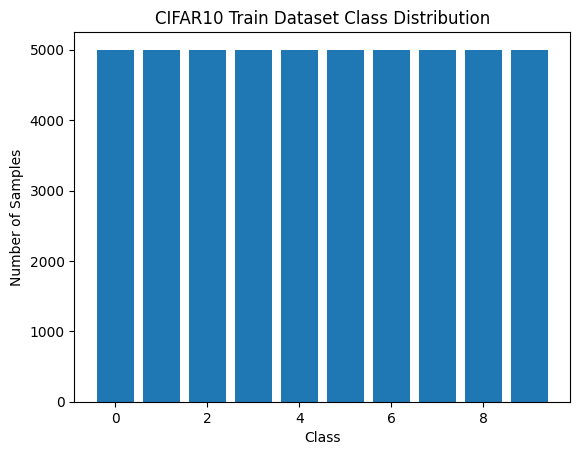

In [44]:
# Visualize the distribution of train dataset
# The CIFAR-10 dataset consists of 
# 60000 32x32 colour images
# 10 classes, 
# 6000 images per class.

# Init class
Train_class_distribution = {i: 0 for i in range(10)}
Test_class_distribution = {i: 0 for i in range(10)}
for _, label in Train_dataset:
    Train_class_distribution[label] += 1
for _, label in Test_dataset:
    Test_class_distribution[label] += 1    

# Visualization
classes = list(Train_class_distribution.keys())
counts = list(Train_class_distribution.values())

plt.bar(classes, counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('CIFAR10 Train Dataset Class Distribution')
plt.show()

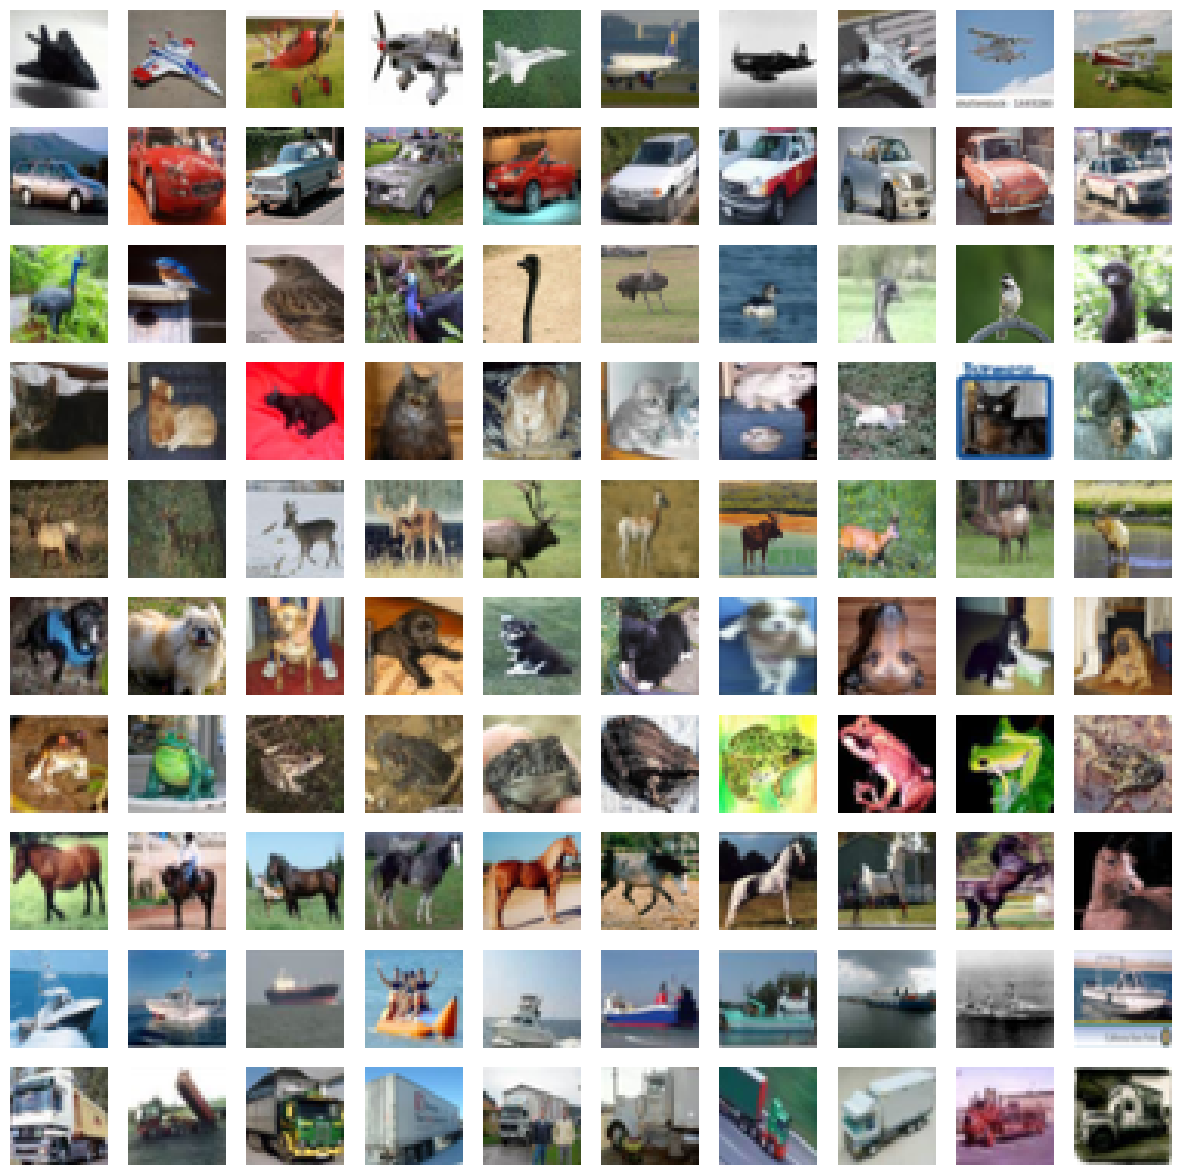

In [45]:
# store images by class
Train_class_images = {i: [] for i in range(10)}
for img, label in Train_dataset:
    Train_class_images[label].append(img)

# visualize 10 images per class
num_images = 10
fig, axes = plt.subplots(10, num_images, figsize=(15, 15))

for i in range(10):
    for j in range(num_images):
        img = np.transpose(Train_class_images[i][j].numpy(), (1, 2, 0))
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_ylabel(f'Class {i}')
            
plt.show()


In [9]:
# split train_dataset into train and validate datasets
train_size = int(0.8 * len(Train_dataset))
val_size = len(Train_dataset) - train_size
Train_data, Val_data = random_split(Train_dataset, [train_size, val_size])

# load data by batch way
batch_size = 32
train_loader = DataLoader(Train_data, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(Val_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(Test_dataset, batch_size=batch_size)

print(len(Train_data), len(Val_data), len(Test_dataset))

40000 10000 10000


# Visualize the distribution of the data and the images

In [11]:
# visualize the distribution
print(Train_data)